In [15]:
from matplotlib import pyplot as plt
import sounddevice as sd
import numpy as np
import soundfile as sf
from scipy.signal import correlate, find_peaks

In [3]:
# Record audii
fs = 44100
duration = 3
audio = sd.rec(int(duration * fs), samplerate=fs, channels=1)
t = np.arange(0, duration, 1 / fs)
sd.wait()

<sounddevice.CallbackFlags: input overflow>

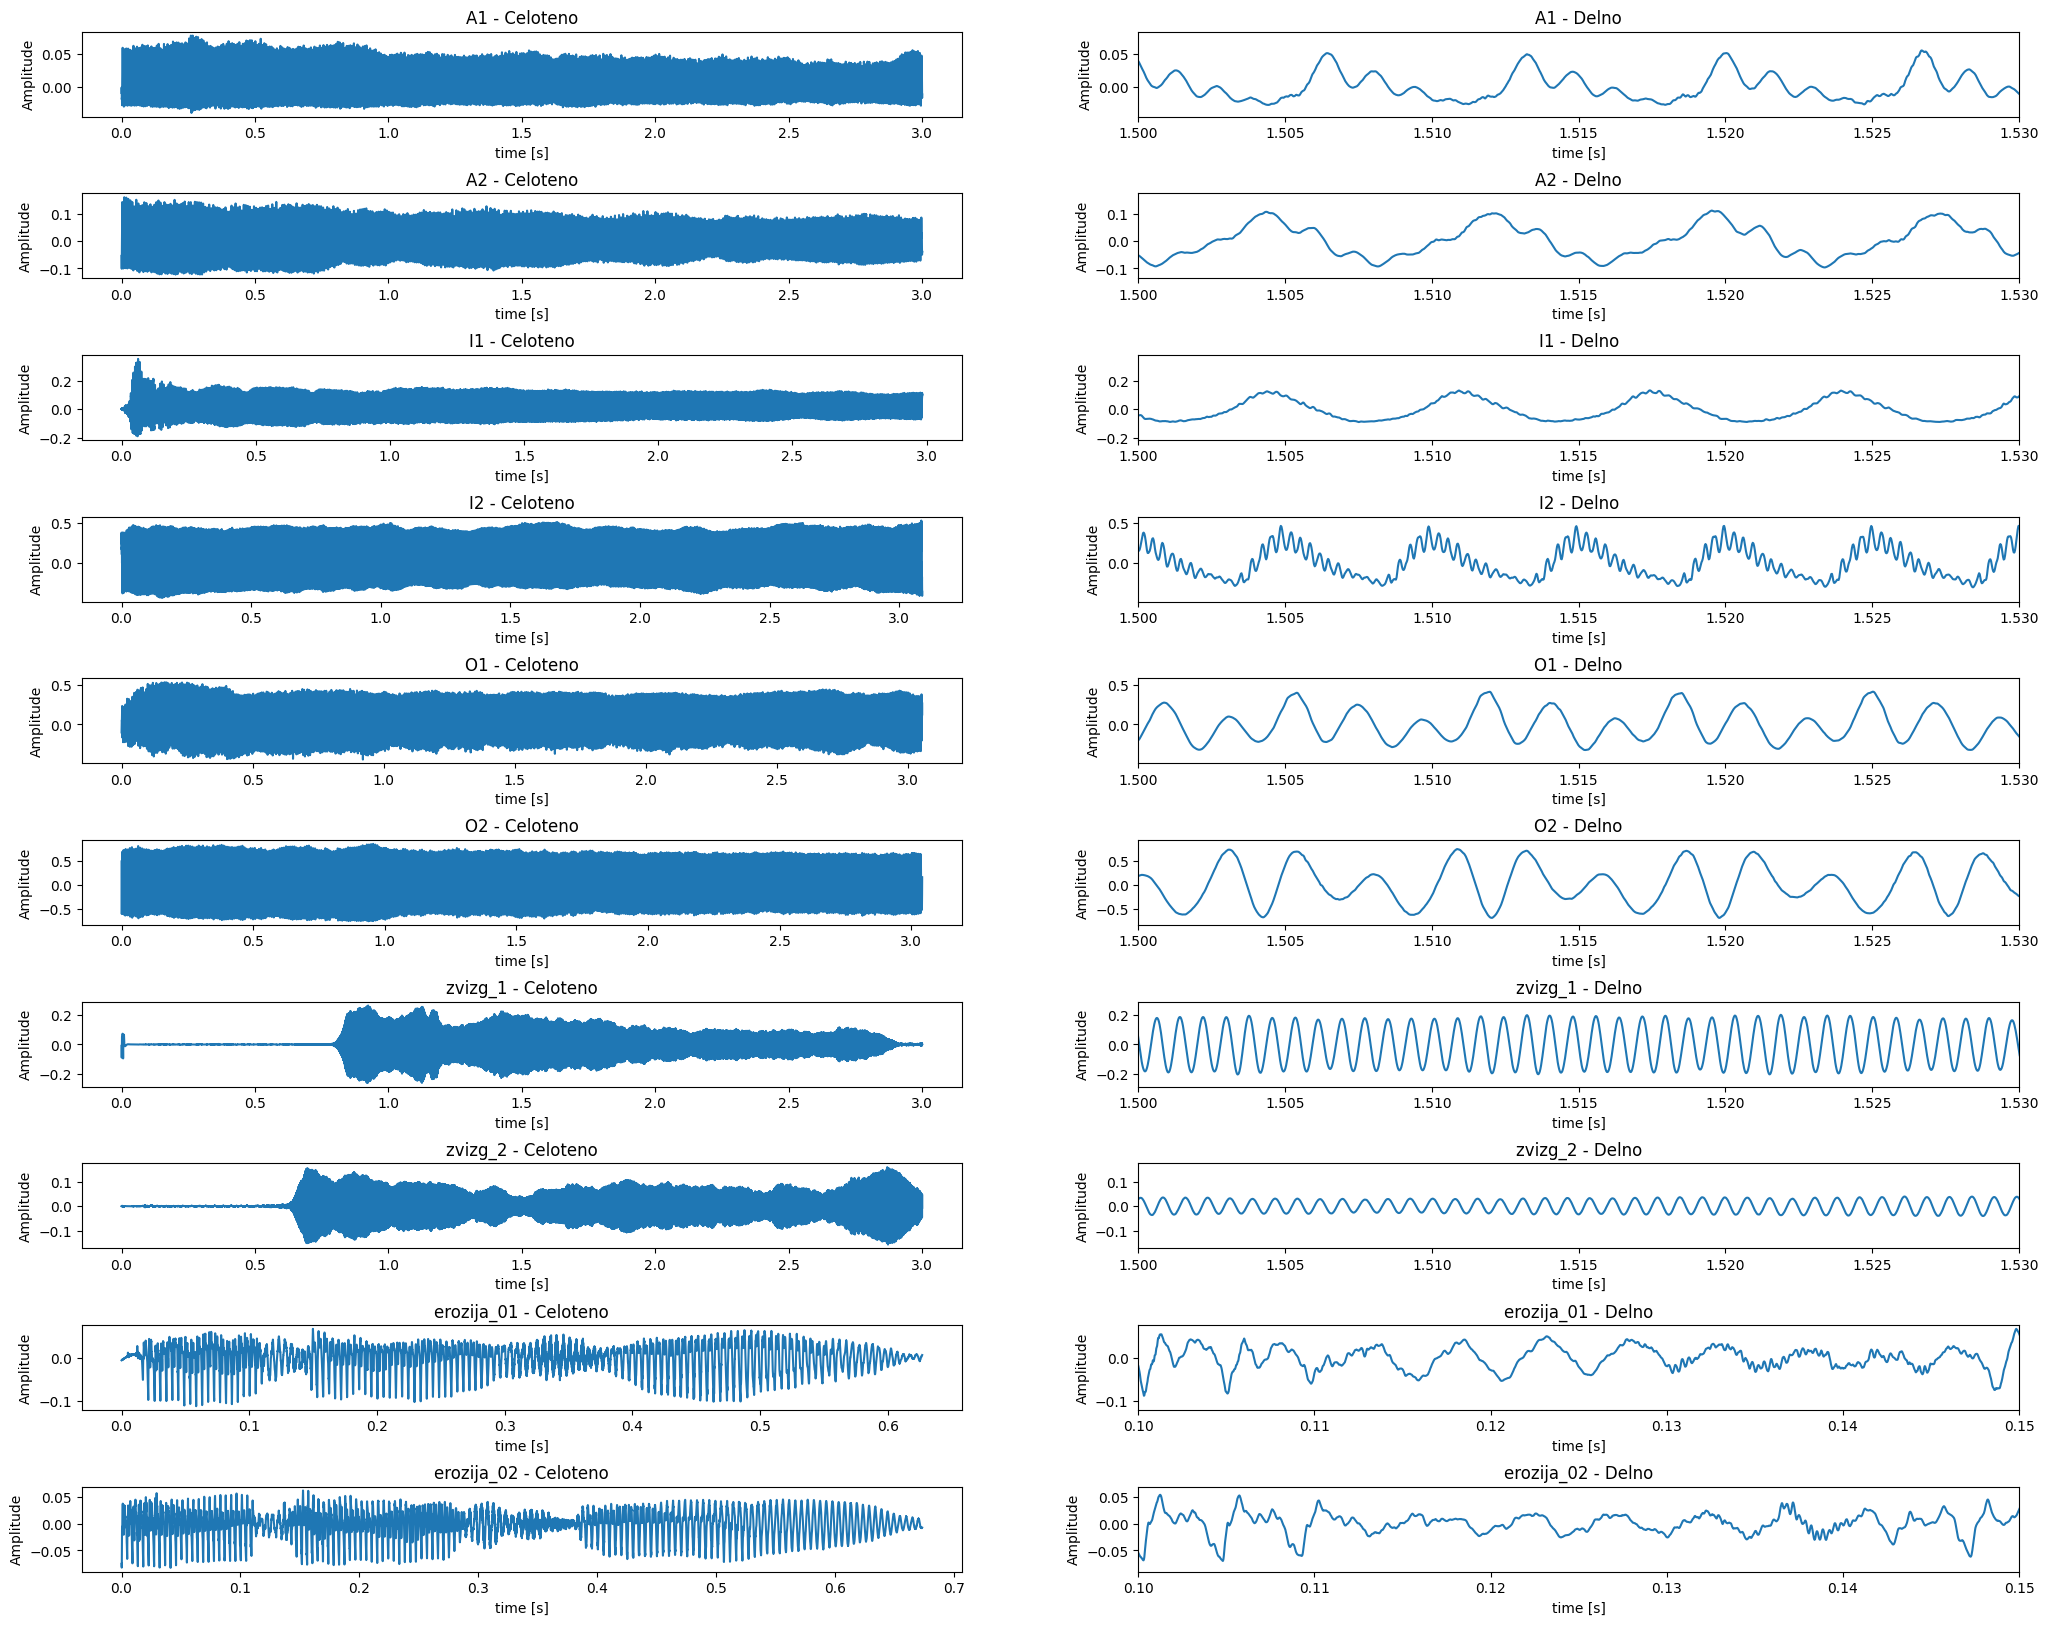

In [11]:
recordings = ['A1', 'A2', 'I1', 'I2', 'O1', 'O2', 'zvizg_1', 'zvizg_2', 'erozija_01', 'erozija_02']
fig, axs = plt.subplots(len(recordings), 2, figsize=(25, 20), gridspec_kw={'hspace': 0.9})
x_lim = (1.5, 1.53)

for i in np.arange(0, len(recordings)):
    audio, fs = sf.read(f'data/{recordings[i]}.wav')
    f = np.fft.fft(audio)
    freqs = np.fft.fftfreq(len(audio), d=1 / fs)
    t = np.arange(0, len(audio)) / fs

    axs[i, 0].plot(t, audio)
    axs[i, 0].set_ylabel('Amplitude')
    axs[i, 0].set_title(f'{recordings[i]} - Celoteno')
    axs[i, 0].set_xlabel('time [s]')

    axs[i, 1].plot(t, audio)
    axs[i, 1].set_ylabel('Amplitude')
    axs[i, 1].set_title(f'{recordings[i]} - Delno')
    axs[i, 1].set_xlabel('time [s]')
    if i <= 7:
        axs[i, 1].set_xlim(x_lim[0], x_lim[1])
    else:
        axs[i, 1].set_xlim(0.1, 0.15)

In [ ]:
def cross_correlation(reference_signal, target_signal, fs):
    correlation = correlate(target_signal, reference_signal, mode='valid')
    time_lags = np.arange(len(correlation)) / fs
    return time_lags, correlation

def find_peaks_in_correlation(time_lags, correlation, threshold=0.5):
    peaks, _ = find_peaks(correlation, height=threshold * np.max(correlation))
    return time_lags[peaks]

Časi nastopa črke 'a': [0.00086168 0.00530612 0.01185941 0.11437642 0.11895692 0.12362812
 0.12823129 0.1393424  0.39981859 0.40496599 0.41004535 0.41514739
 0.42027211 0.42546485]
Časi nastopa črke 'i': [0.0784127  0.37514739 0.38022676 0.3853288  0.39043084 0.39557823
 0.40068027 0.40578231 0.41090703 0.41600907 0.42117914 0.42637188
 0.43156463 0.43678005 0.44204082 0.44727891 0.45253968 0.45782313
 0.46312925 0.46845805 0.47378685 0.47911565 0.48444444 0.48977324
 0.49517007]
Časi nastopa črke 'o': [0.07111111 0.10410431 0.10648526 0.10868481 0.11095238 0.11312925
 0.1154195  0.1175737  0.11984127 0.12201814 0.12643991 0.13909297
 0.21349206 0.21827664 0.22312925 0.49954649 0.51020408]


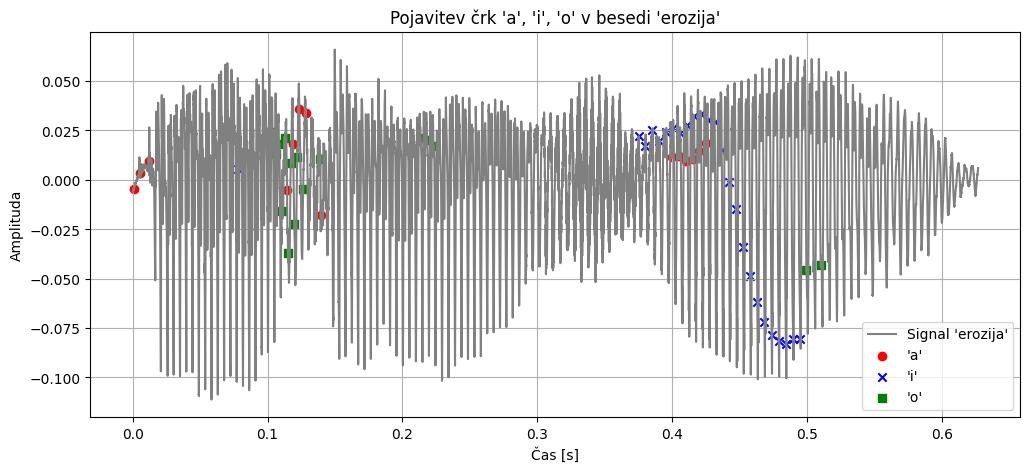

Časi nastopa črke 'a': [0.03396825 0.0385034  0.0430839  0.0475737  0.05208617 0.05664399
 0.06117914 0.06569161 0.07018141 0.07244898 0.13281179 0.13730159
 0.13943311 0.14174603 0.14394558 0.14619048 0.1484127  0.15292517
 0.15743764 0.16192744]
Časi nastopa črke 'i': [0.2578458  0.26285714 0.26793651 0.27301587 0.38802721 0.3930839
 0.39814059 0.40326531 0.408322   0.41344671 0.41857143 0.42365079
 0.42875283 0.4338322  0.43891156 0.44401361 0.44911565 0.45421769
 0.4593424  0.46446712 0.46961451 0.4747619  0.47993197 0.48512472
 0.49031746 0.4955102  0.50072562 0.50596372 0.51120181 0.51641723
 0.52165533 0.52687075 0.53210884 0.53734694 0.54256236 0.54780045
 0.55301587 0.55820862 0.56340136 0.56854875 0.57367347 0.57879819
 0.5839229  0.58904762 0.59419501]
Časi nastopa črke 'o': [0.11133787 0.11353741 0.11571429 0.11791383 0.1200907  0.12229025
 0.12446712 0.12664399 0.12884354 0.13104308 0.13319728 0.1354195
 0.1375737 ]


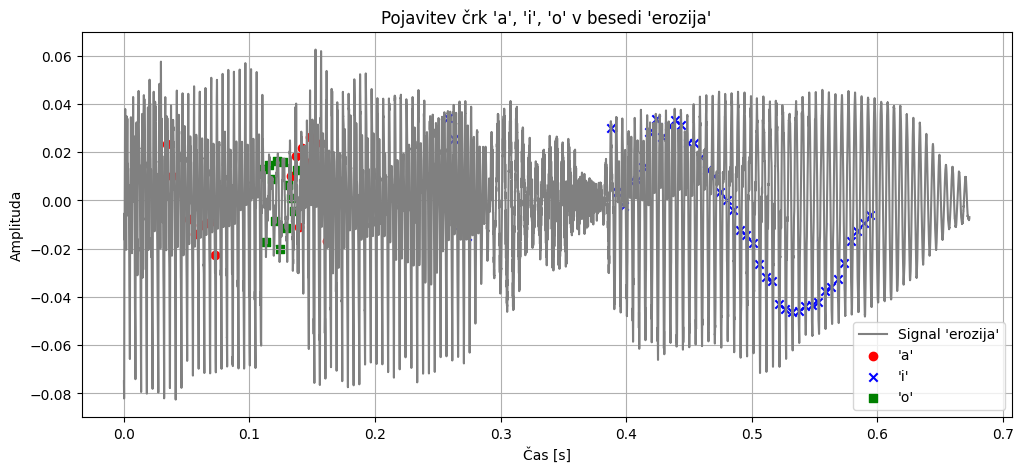

In [20]:
files = [1, 2]
for fileNumber in files:
    erozija_signal, fs_erozija  = sf.read(f"data/erozija_0{fileNumber}.wav")
    a_signal, fs_a  = sf.read(f"data/A{fileNumber}")
    i_signal, fs_i  = sf.read(f"data/I{fileNumber}")
    o_signal, fs_o = sf.read(f"data/O{fileNumber}")

    N = int(0.05 * fs)
    a_segment = a_signal[:N]
    i_segment = i_signal[:N]
    o_segment = o_signal[:N]

    time_lags_a, corr_a = cross_correlation(a_segment, erozija_signal, fs_erozija)
    time_lags_i, corr_i = cross_correlation(i_segment, erozija_signal, fs_erozija)
    time_lags_o, corr_o = cross_correlation(o_segment, erozija_signal, fs_erozija)

    peaks_a = find_peaks_in_correlation(time_lags_a, corr_a, threshold=0.6)
    peaks_i = find_peaks_in_correlation(time_lags_i, corr_i, threshold=0.6)
    peaks_o = find_peaks_in_correlation(time_lags_o, corr_o, threshold=0.6)

    print("Časi nastopa črke 'a':", peaks_a)
    print("Časi nastopa črke 'i':", peaks_i)
    print("Časi nastopa črke 'o':", peaks_o)

    plt.figure(figsize=(12, 5))
    time_erozija = np.arange(len(erozija_signal)) / fs_erozija
    plt.plot(time_erozija, erozija_signal, label="Signal 'erozija'", color='gray')

    def get_amplitudes(signal, fs, times):
        indices = (times * fs).astype(int)
        return signal[indices]

    plt.scatter(peaks_a, get_amplitudes(erozija_signal, fs_erozija, peaks_a), color='red', label="'a'", marker='o')
    plt.scatter(peaks_i, get_amplitudes(erozija_signal, fs_erozija, peaks_i), color='blue', label="'i'", marker='x')
    plt.scatter(peaks_o, get_amplitudes(erozija_signal, fs_erozija, peaks_o), color='green', label="'o'", marker='s')

    plt.xlabel("Čas [s]")
    plt.ylabel("Amplituda")
    plt.title("Pojavitev črk 'a', 'i', 'o' v besedi 'erozija'")
    plt.legend()
    plt.grid()
    plt.show()